#### Lifecycle of a DS projects
#### 1. Data Collection
    #### Continuous Data (Discrete data)
    #### Categorical Data
### Type of missing data: 
    ### Missing completely at random, MCAR:
#### 2. Feature Engineering = Handling missing values
#### 3. Review the missing on missing data. 

In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
### Find null in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# print the rows which are null for Embarked 
# missing completely at random 
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
# Missing data not at random (MNAR)
# There is some relationship between data missing, 
# and other values within dataset
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
###Find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [12]:
### New feature "cabin_null" is addedd to the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [14]:
# compare the "cabin_null" with the "Survived"
df.groupby(['Survived'])['cabin_null'].mean()
# 60% missing data for survived
# 87% missing data for non survived

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

14.526497332334044
13.019696550973194


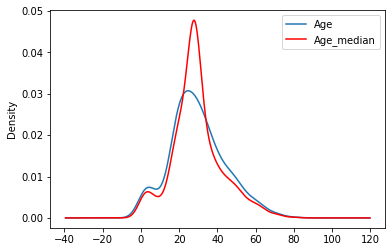

In [39]:
#Missing at Random(MAR)

#Technicques of handling missing values
# 1. Mean/Median Mode replacement
# Assumption is the data missing at random (MCAR)
# Solution is to replace the NAN with most frequent occurance of the variable
df_afs = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df_afs.head()
# Percentage of missing values
df_afs.isnull().mean()
# Function to impute NAN value by Mean/Median
def impute_nan(df_afs,variable,median):
        df_afs[variable+"_median"]=df[variable].fillna(median)
median = df.Age.median()
median
impute_nan(df_afs,'Age',median)
df_afs[df_afs['Age'].isnull()]

print(df_afs['Age'].std())
print(df_afs['Age_median'].std())

#kernel density estimators (kde)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df_afs['Age'].plot(kind='kde', ax=ax)
df_afs.Age_median.plot(kind='kde',ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

##Pro
##1. Easy to implement
##2. Faster way to obtain the complete data
#Con
## Change/Distortion in the original variance



In [25]:
# 2. Random Sample Imputation
# Objective: Take random sample imputation consists of taking random 
# observation from dataset and use this to replace NAN values
df_afs = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df_afs.head()
# Percentage of missing values
#Condition to fetch Age with null values 
# df[df['Age'].isnull()].index
df_afs['Age'].isnull().sum()
#Get NaN values replaced with some sample values
df_afs['Age'].dropna().sample(df_afs['Age'].isnull().sum(),random_state=0)
median=df.Age.median()
def impute_nan(df_afs,variable,median):
        df_afs[variable+"_median"]=df[variable].fillna(median)
        df_afs[variable+"_random"]=df[variable]
        random_sample = df_afs[variable].dropna().sample(df_afs['Age'].isnull().sum(),random_state=0)
        random_sample.index=df[df[variable].isnull()].index
        df_afs.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [27]:
impute_nan(df_afs,'Age',median)
df_afs.head()

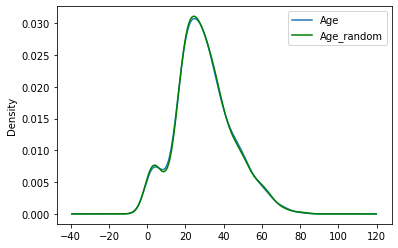

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df_afs['Age'].plot(kind='kde', ax=ax)
df_afs.Age_random.plot(kind='kde',ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#Pro: Easy to implement and less distortion in variance
#Con: Every situation randomness won't work. 

In [66]:
# 3. Capturing NAN values with a new feature
# useful if the data are not missing completely at random
import numpy as np
df_afs = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df_afs.head()
df_afs['Age_NaN'] = np.where(df_afs['Age'].isnull(),1,0)
df_afs['Age'].fillna(df.Age.median(),inplace=True)
df_afs.head(10)
#Pro - Captures the importance of missing values
#Con - Creating Additional Feature (Curse of Dimensionality)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


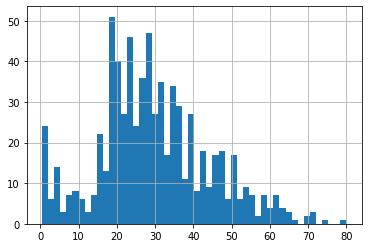

In [68]:
#4. End of Distribution imputation
df_afs = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df_afs.head()

df_afs.Age.hist(bins=50)

In [69]:
# Pick the extreme value of distribution
extreme=df_afs.Age.mean()+3*df_afs.Age.std()

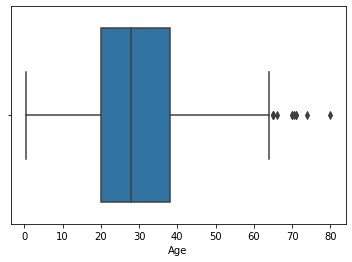

In [70]:
import seaborn as sns
sns.boxplot('Age',data=df_afs)

In [61]:
def impute_nan(df,variable,median,extreme):
        df[variable+"_end_distribution"] = df[variable].fillna(extreme)
        df[variable].fillna(median,inplace=True)

In [71]:
impute_nan(df_afs,'Age',median,extreme)

     Survived   Age     Fare  Age_end_distribution
0           0  22.0   7.2500              22.00000
1           1  38.0  71.2833              38.00000
2           1  26.0   7.9250              26.00000
3           1  35.0  53.1000              35.00000
4           0  35.0   8.0500              35.00000
..        ...   ...      ...                   ...
886         0  27.0  13.0000              27.00000
887         1  19.0  30.0000              19.00000
888         0  28.0  23.4500              73.27861
889         1  26.0  30.0000              26.00000
890         0  32.0   7.7500              32.00000

[891 rows x 4 columns]


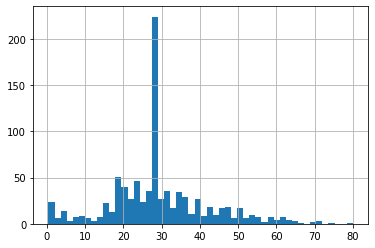

In [74]:
print(df_afs)
df_afs.Age.hist(bins=50)


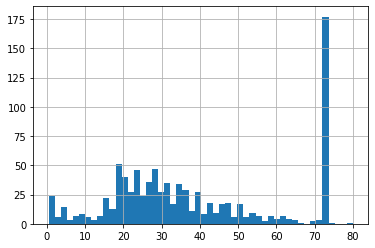

In [75]:
df_afs.Age_end_distribution.hist(bins=50)

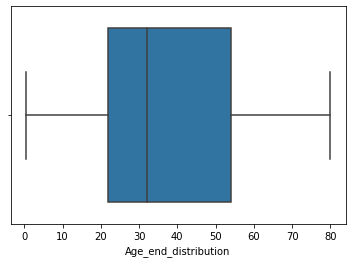

In [77]:
sns.boxplot('Age_end_distribution',data=df_afs)
#Outlier is captured by using end of distribution imputation

In [2]:
# 5. Arbitary imputation
# Replacing NaN by an arbitarty value
# pro - if there is missing value it captures the importance
# con - Hard to decide which value to use. 
# -If missing values are not important, it may mask the predictive power of the original va
# variable by distorting its distribution
import numpy as np
import pandas as pd
df_afs = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df_afs.head()
 

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan(df,variable,):
    df[variable+"_zero"]=df[variable].fillna(0)
    df[variable+"_hundred"]=df[variable].fillna(100)

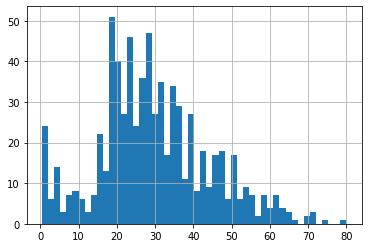

In [3]:
df_afs.Age.hist(bins=50)

In [18]:
#6. Frequent categories imputation.
df_HPT = pd.read_csv('HousePricesTrain.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df_HPT.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [19]:
df_HPT.shape

(1460, 4)

In [20]:
df_HPT.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [22]:
df_HPT.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

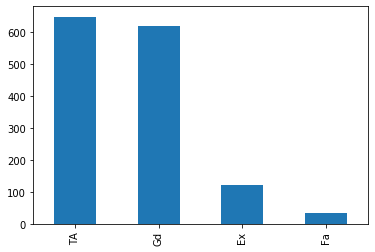

In [24]:
#### Compute the frequency with every feature

df_HPT['BsmtQual'].value_counts().plot.bar()

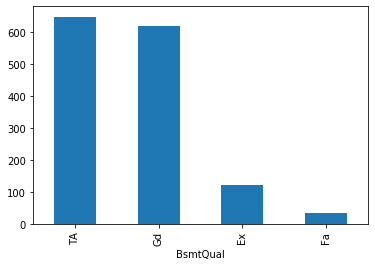

In [25]:
df_HPT.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

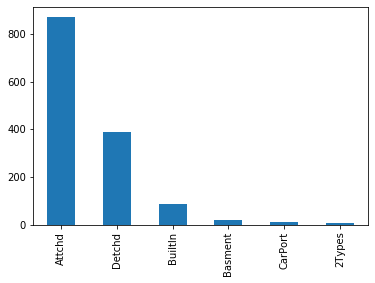

In [26]:
df_HPT['GarageType'].value_counts().plot.bar()

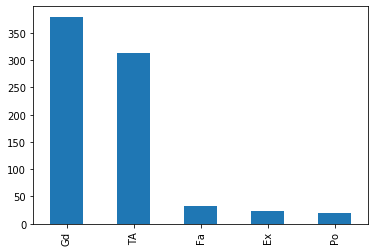

In [27]:
df_HPT['FireplaceQu'].value_counts().plot.bar()

In [30]:
df_HPT['GarageType'].value_counts().index[0]

'Attchd'

In [32]:
df_HPT['GarageType'].mode()[0]

'Attchd'

In [36]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    print(most_frequent_category)
    df[variable].fillna(most_frequent_category,inplace=True)
    print(df[variable].head())

In [37]:
impute_nan(df_HPT,'BsmtQual')

TA
0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object


In [45]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df_HPT,feature)

TA
0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object
Gd
0    Gd
1    TA
2    TA
3    Gd
4    TA
Name: FireplaceQu, dtype: object
Attchd
0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object


In [44]:
import statistics 
statistics.mode([1, 2, 3, 4, 4, 4, 4, 5, 6, 7, 7, 7, 8])
# We can infer that 4 has the highest population distribution 
# So mode of set1 is 4 

4

In [46]:
df_HPT.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [47]:
####Advantages
####Easy To implement
####Fater way to implement #### Disadvantages
####Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
####It distorts the relation of the most frequent label

df_HPT = pd.read_csv('HousePricesTrain.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df_HPT.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [49]:
import numpy as np
df_HPT['BsmtQual_Var']=np.where(df_HPT['BsmtQual'].isnull(),1,0)

In [55]:
df_HPT.head(20)
df_HPT['BsmtQual'].mode()[0]

'TA'

In [61]:
frequent=df_HPT['BsmtQual'].mode()[0]
df_HPT['BsmtQual'].fillna(frequent,inplace=True)
df_HPT.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [57]:
df_HPT['FireplaceQu'].mode()[0]

'Gd'

In [58]:
df_HPT['BsmtQual'].mode()[0]

'TA'

In [60]:
df_HPT['FireplaceQu_Var']=np.where(df_HPT['FireplaceQu'].isnull(),1,0)
frequent=df_HPT['FireplaceQu'].mode()[0]
df_HPT['FireplaceQu'].fillna(frequent,inplace=True)

In [62]:
df_HPT.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [63]:
#Suppose if you have more frequent categories, we just replace NAN with a new category
df_H= pd.read_csv('HousePricesTrain.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df_H.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [64]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [65]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df_H,feature)

In [66]:
df_H.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [67]:
df_H=df_H.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df_H.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


In [68]:
### Ordinal Number Encoding - Rank categories based on certain value
### For example: Grading system - 
import datetime

In [69]:
today_date=datetime.datetime.today()

In [70]:
today_date

datetime.datetime(2021, 1, 8, 8, 42, 51, 729391)

In [71]:
# Date - 3 days
today_date-datetime.timedelta(3)

datetime.datetime(2021, 1, 5, 8, 42, 51, 729391)

In [72]:
#### List Comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [73]:
import pandas as pd
data=pd.DataFrame(days)
data.columns=["Day"]

In [74]:
data.head()

,Day
0,2021-01-08 08:42:51.729391
1,2021-01-07 08:42:51.729391
2,2021-01-06 08:42:51.729391
3,2021-01-05 08:42:51.729391
4,2021-01-04 08:42:51.729391


In [84]:
data['weekday']=data['Day'].dt.day_name()
data.head()


,Day,weekday
0,2021-01-08 08:42:51.729391,Friday
1,2021-01-07 08:42:51.729391,Thursday
2,2021-01-06 08:42:51.729391,Wednesday
3,2021-01-05 08:42:51.729391,Tuesday
4,2021-01-04 08:42:51.729391,Monday


In [85]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [86]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [87]:
data['weekday_ordinal']=data['weekday'].map(dictionary)

In [88]:
data

,Day,weekday,weekday_ordinal
0,2021-01-08 08:42:51.729391,Friday,5
1,2021-01-07 08:42:51.729391,Thursday,4
2,2021-01-06 08:42:51.729391,Wednesday,3
3,2021-01-05 08:42:51.729391,Tuesday,2
4,2021-01-04 08:42:51.729391,Monday,1
5,2021-01-03 08:42:51.729391,Sunday,7
6,2021-01-02 08:42:51.729391,Saturday,6
7,2021-01-01 08:42:51.729391,Friday,5
8,2020-12-31 08:42:51.729391,Thursday,4
9,2020-12-30 08:42:51.729391,Wednesday,3


In [89]:
#### Count or Frequency Encoding
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
columns=[1,3,5,6,7,8,9,13]
train_set=train_set[columns]


In [91]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [92]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [93]:
#Find categories for each feature in the data set
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [94]:
country_map=train_set['Country'].value_counts().to_dict()

In [96]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

##### Advantages
    Easy To Use
    Not increasing feature space 
    
##### Disadvantages
#### It will provide same weight if the frequencies are same
#### Target Guided Ordinal Encoding
#### Ordering the labels according to the target
#### Replace the labels by the joint probability of being 1 or 0

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


In [101]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [104]:
df['Cabin'].fillna('Missing',inplace=True)

In [105]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [106]:

df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [107]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [108]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [109]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [110]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [111]:
enumerate(ordinal_labels,0)

In [112]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [113]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


In [114]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [115]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}